In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heartdisease.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
## Null check
df.isnull().sum().sum()

645

In [5]:
## Filing the Nan values
df.fillna(0,inplace = True)

In [6]:
df.isnull().sum().sum()

0

In [7]:
shuffle_df = df.sample(frac = 1)

In [8]:
shuffle_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2760,0,44,3.0,0,0.0,0.0,0,0,0,244.0,132.5,87.0,24.17,58.0,86.0,0
4050,1,50,2.0,1,20.0,0.0,0,0,0,262.0,97.5,62.5,21.55,80.0,84.0,0
1994,1,43,2.0,0,0.0,1.0,0,1,0,234.0,173.0,96.0,27.99,100.0,76.0,0
1486,1,54,1.0,0,0.0,0.0,0,0,0,206.0,141.0,92.0,35.85,75.0,120.0,0
95,0,65,3.0,0,0.0,0.0,0,0,0,193.0,123.0,76.5,29.33,60.0,96.0,0


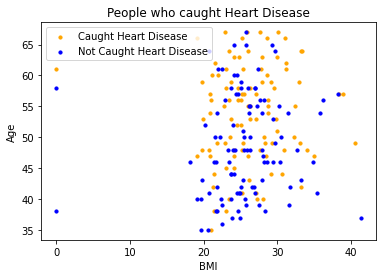

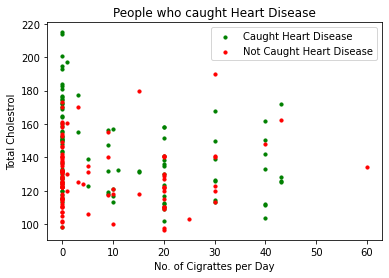

In [9]:
## Visualising our data
Y = shuffle_df.iloc[:,-1]
caught_disease = shuffle_df.loc[Y==1]
not_caught_disease = shuffle_df.loc[Y==0]

plt.ylabel('Age')
plt.xlabel('BMI')
plt.title('People who caught Heart Disease')
plt.scatter(caught_disease.iloc[:100,12],caught_disease.iloc[:100,1] , s = 10 , c = 'orange' , label = 'Caught Heart Disease')
plt.scatter(not_caught_disease.iloc[:100,12],not_caught_disease.iloc[:100,1] , s = 10 , c = 'blue' , label = 'Not Caught Heart Disease')
plt.legend()
plt.show()

plt.ylabel('Total Cholestrol')
plt.xlabel('No. of Cigrattes per Day')
plt.title('People who caught Heart Disease')
plt.scatter(caught_disease.iloc[:100,4],caught_disease.iloc[:100,10] , s = 10 , c = 'green' , label = 'Caught Heart Disease')
plt.scatter(not_caught_disease.iloc[:100,4],not_caught_disease.iloc[:100,10] , s = 10 , c = 'red' , label = 'Not Caught Heart Disease')
plt.legend()
plt.show()

In [10]:
y = shuffle_df.iloc[:,-1].values.reshape(-1,1)
x = shuffle_df.iloc[:,:-1].values.reshape(-1,15)

train_size = int(0.7* len(shuffle_df))

In [11]:
## Normalized the data
for i in range(15):
    x[:,i] = (x[:,i] - min(x[:,i])) / (max(x[:,i]) - min(x[:,i]))

In [12]:
x

array([[0.        , 0.31578947, 0.75      , ..., 0.42552817, 0.40559441,
        0.21827411],
       [1.        , 0.47368421, 0.5       , ..., 0.37940141, 0.55944056,
        0.21319797],
       [1.        , 0.28947368, 0.5       , ..., 0.49278169, 0.6993007 ,
        0.1928934 ],
       ...,
       [0.        , 0.15789474, 0.5       , ..., 0.43309859, 0.51748252,
        0.        ],
       [1.        , 0.55263158, 0.5       , ..., 0.46267606, 0.57342657,
        0.17005076],
       [1.        , 0.26315789, 0.5       , ..., 0.41478873, 0.48951049,
        0.18527919]])

In [13]:
## Splitting dataset into train and test
X_train , X_test , y_train , y_test = x[:train_size] , x[train_size:] , y[:train_size] , y[train_size:]

In [14]:
X_train

array([[0.        , 0.31578947, 0.75      , ..., 0.42552817, 0.40559441,
        0.21827411],
       [1.        , 0.47368421, 0.5       , ..., 0.37940141, 0.55944056,
        0.21319797],
       [1.        , 0.28947368, 0.5       , ..., 0.49278169, 0.6993007 ,
        0.1928934 ],
       ...,
       [0.        , 0.71052632, 0.25      , ..., 0.46566901, 0.48951049,
        0.23857868],
       [0.        , 0.44736842, 0.25      , ..., 0.44524648, 0.6993007 ,
        0.18781726],
       [0.        , 0.5       , 0.25      , ..., 0.56954225, 0.52447552,
        0.26142132]])

In [15]:
## Preping our data
ones = np.ones([X_train.shape[0],1] , dtype = np.float128)
X_train = np.concatenate((ones,X_train),axis=1)
theta = np.zeros([1,X_train.shape[1]], dtype = np.float128)


In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [17]:
def compute_cost(X, y, theta):
    m = len(y)
    
    h = sigmoid(X @ theta.T)
    epsilon = 1e-5
    cost = 1/m * np.sum((-y).T @ np.log(sigmoid(X @ theta.T)) - (1-y).T @ np.log(1 - sigmoid(X @ theta.T )))
    return cost

In [18]:
def gradient_descent(X, y, theta, alpha, iters):
    m = len(y)
    
    costing = np.zeros((iters,1))

    for i in range(iters):
        ALPHA = sigmoid(X @theta.T)
        BETA = (ALPHA - y).T
        SIGMA = alpha/m * (BETA @ X)
        theta = theta - SIGMA
        costing[i] = compute_cost(X, y, theta)

    return theta , costing

In [19]:
def predict(X, theta):
    a = sigmoid(X @ theta.T)
    b = [0. for i in range(len(a))]
    for i in range(len(a)):
        if a[i]>=a.mean():
            b[i] = 1.
        
    
    return b

In [20]:


alpha = 0.03
iters = 1000

initial_cost = compute_cost(X_train, y_train, theta)




In [21]:
THETA , costing = gradient_descent(X_train, y_train, theta, alpha, iters)

y_pred = predict(X_train, THETA)

tp,tn,fp,fn = [0 for _ in range(4)]

for i in range(len(y_pred)):
  if(y_pred[i]==1. and y_train[i]==1.):
    tp+=1
  if(y_pred[i]==0. and y_train[i]==0.):
    tn+=1
  if(y_pred[i]==1. and y_train[i]==0.):
    fp+=1
  if(y_pred[i]==0. and y_train[i]==1.):
    fn+=1

In [22]:
print(tp,tn,fp,fn)

280 1552 947 187


In [23]:
precision = float(tp) / float(fp + tp)
recall = float(tp) / float(tp + fn)
  
f1_score = 2 * float(precision * recall) / float(precision + recall)

In [24]:
print(f"The Accuracy of the model is {f1_score}")

The Accuracy of the model is 0.3305785123966942


In [25]:
## Testing For new Values
ones = np.ones([X_test.shape[0],1] , dtype = np.float128)
X_test = np.concatenate((ones,X_test),axis=1)

NEW = predict(X_test,THETA)
ANS = []
for i in NEW:
    if i == 1.0:
        ANS.append('ON RISK')
    else:
        ANS.append('NOT ON RISK')
ANS

['ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'NOT ON RISK',
 'ON RISK',
 'NOT ON RISK',
 'ON